In [11]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

MODELS_FOLDER = os.path.join("data", "DNN_trained_models")
LOG_FILE = os.path.join("data", "DNN_trained_models_docs.csv")
SIM_DATA_FILE = os.path.join("data", "COMSOL", "results_3D_GE_Applied_Current_1MKOH_63_02_1MKOH_input_parameters_DOE_maximin_lhs_processed_003.csv")
DOE_DATA_FILE = os.path.join("data", "DOE_output_results", "1MKOH_input_parameters_DOE_maximin_lhs.csv")
FIG_FOLDER = "figures"
BEST_MODEL = "model_results_3D_GE_Applied_Current_1MKOH_63_02_1MKOH_input_parameters_DOE_maximin_lhs_processed_003__250526_021932"


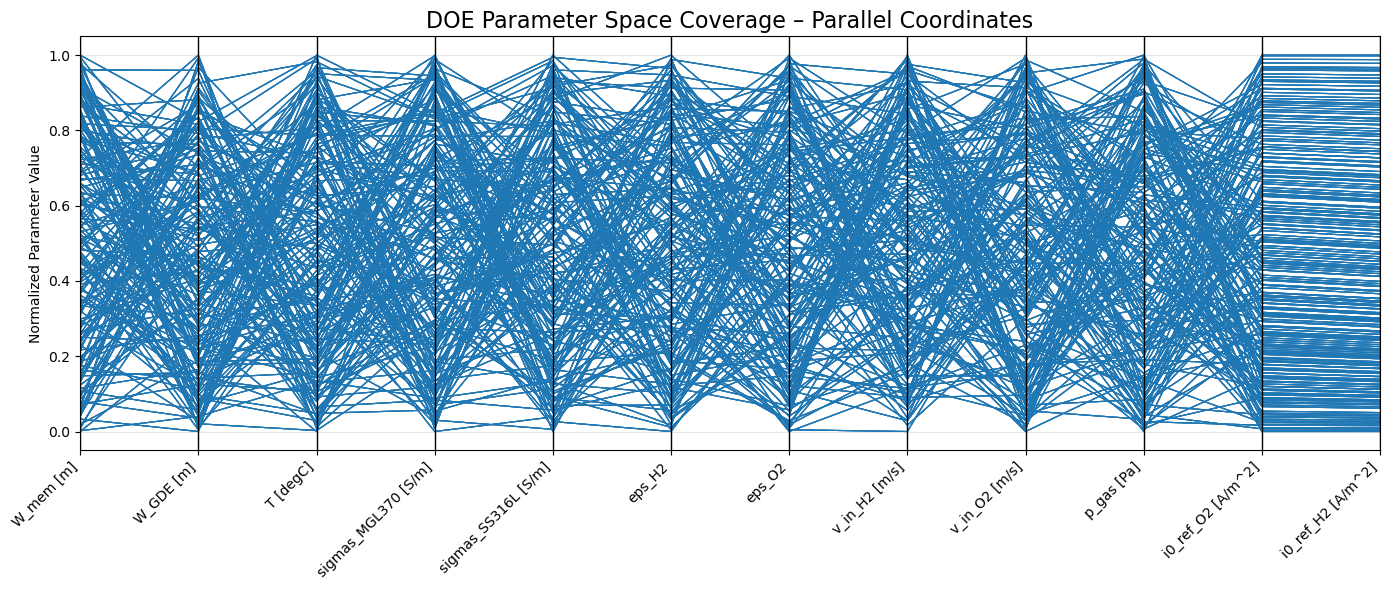

In [12]:
# Load your DOE-generated dataset (replace with your actual data file)
doe_data = pd.read_csv(SIM_DATA_FILE)

# Define parameter columns
parameter_columns = [
    "W_mem [m]", "W_GDE [m]", "T [degC]", "sigmas_MGL370 [S/m]",
    "sigmas_SS316L [S/m]", "eps_H2", "eps_O2", 
    "v_in_H2 [m/s]", "v_in_O2 [m/s]", "p_gas [Pa]",
    "i0_ref_O2 [A/m^2]", "i0_ref_H2 [A/m^2]"
]

# Normalize data for readability
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(doe_data[parameter_columns])
df_normalized = pd.DataFrame(normalized_data, columns=parameter_columns)

# Add dummy class column for color (single class for all data)
df_normalized['class'] = 'DOE samples'

# Plot Parallel Coordinates
plt.figure(figsize=(14, 6))
parallel_coordinates(df_normalized, class_column='class', color=['#1f77b4'], alpha=0.3, linewidth=0.8)

plt.title("DOE Parameter Space Coverage – Parallel Coordinates", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Normalized Parameter Value")
plt.grid(True, alpha=0.3)
plt.legend().set_visible(False)
plt.tight_layout()
# plt.savefig("IMAGES/DOE_parallel_coordinates.png", dpi=300)
plt.show()


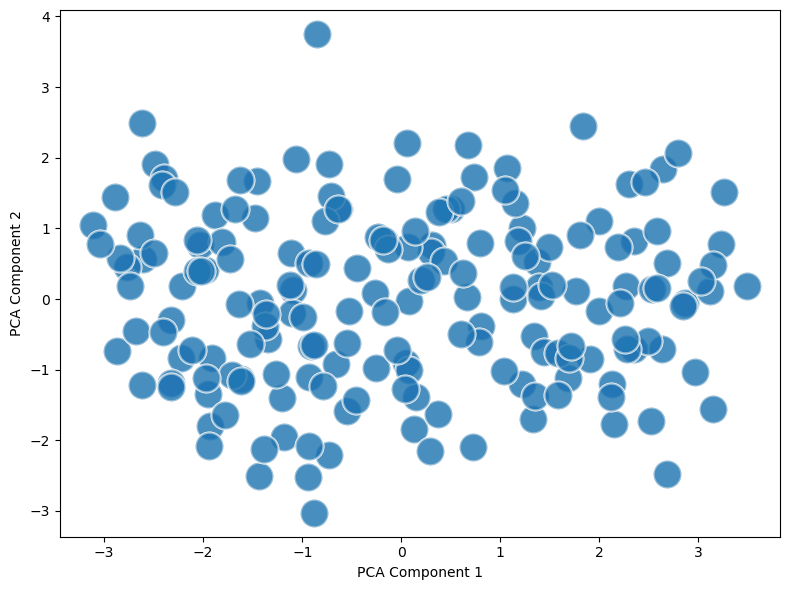

In [19]:
# Select parameter columns
parameter_columns = [
    "W_mem [m]", "W_GDE [m]", "T [degC]", "sigmas_MGL370 [S/m]",
    "sigmas_SS316L [S/m]", "eps_H2", "eps_O2", 
    "v_in_H2 [m/s]", "v_in_O2 [m/s]", "p_gas [Pa]",
    "i0_ref_O2 [A/m^2]", "i0_ref_H2 [A/m^2]"
]

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(doe_data[parameter_columns])

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], s=400, alpha=0.1)
# plt.title("DOE Parameter Space (PCA Projection)", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
# plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
# plt.savefig("IMAGES/DOE_PCA_projection.png", dpi=300)
plt.show()


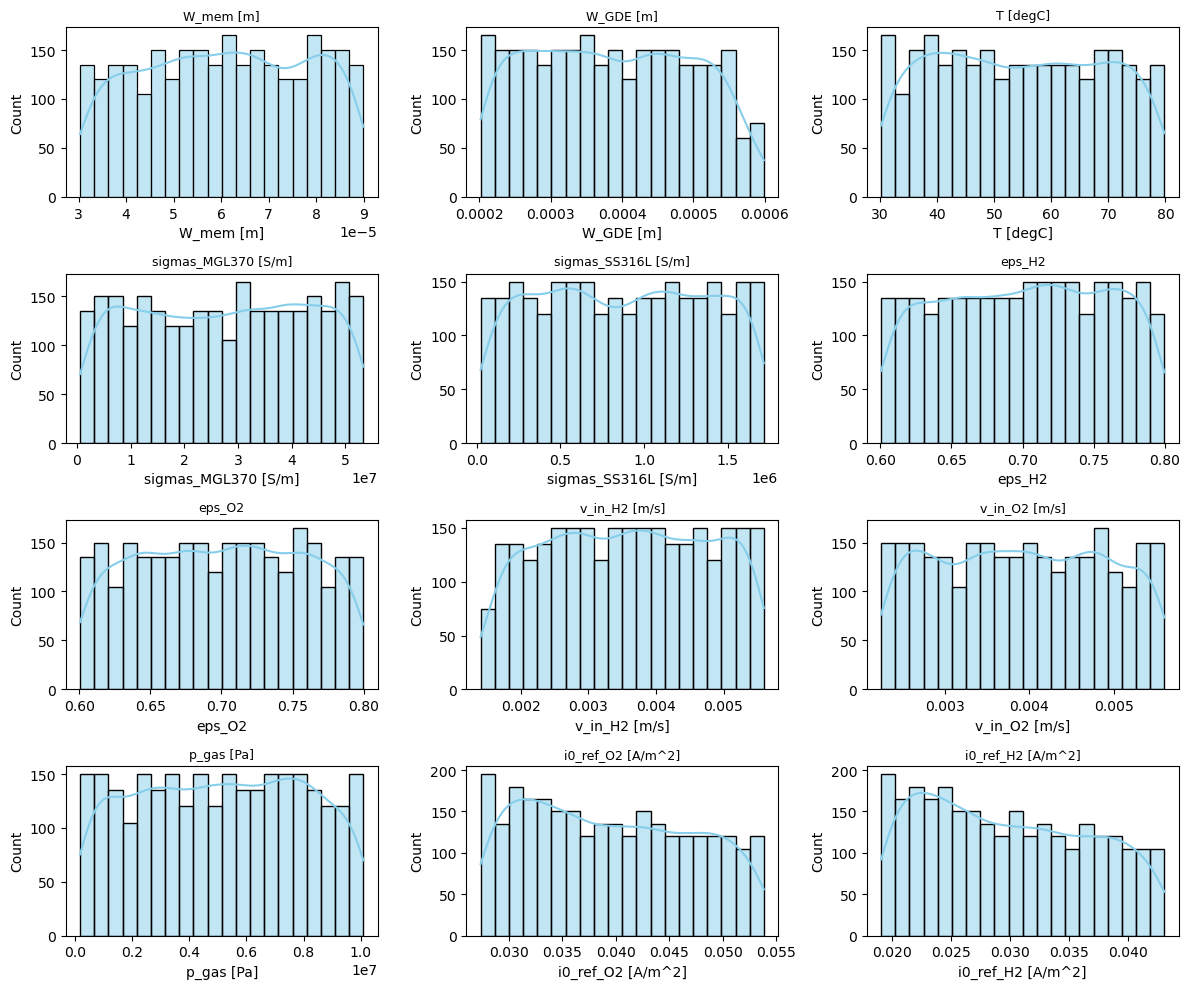

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
for i, col in enumerate(parameter_columns):
    plt.subplot(4, 3, i + 1)
    sns.histplot(doe_data[col], kde=True, bins=20, color='skyblue')
    plt.title(col, fontsize=9)
    plt.tight_layout()
# plt.suptitle("Marginal Distributions of DOE Parameters", y=1.02, fontsize=14)
# plt.savefig("IMAGES/DOE_marginal_distributions.png", dpi=300)
plt.show()


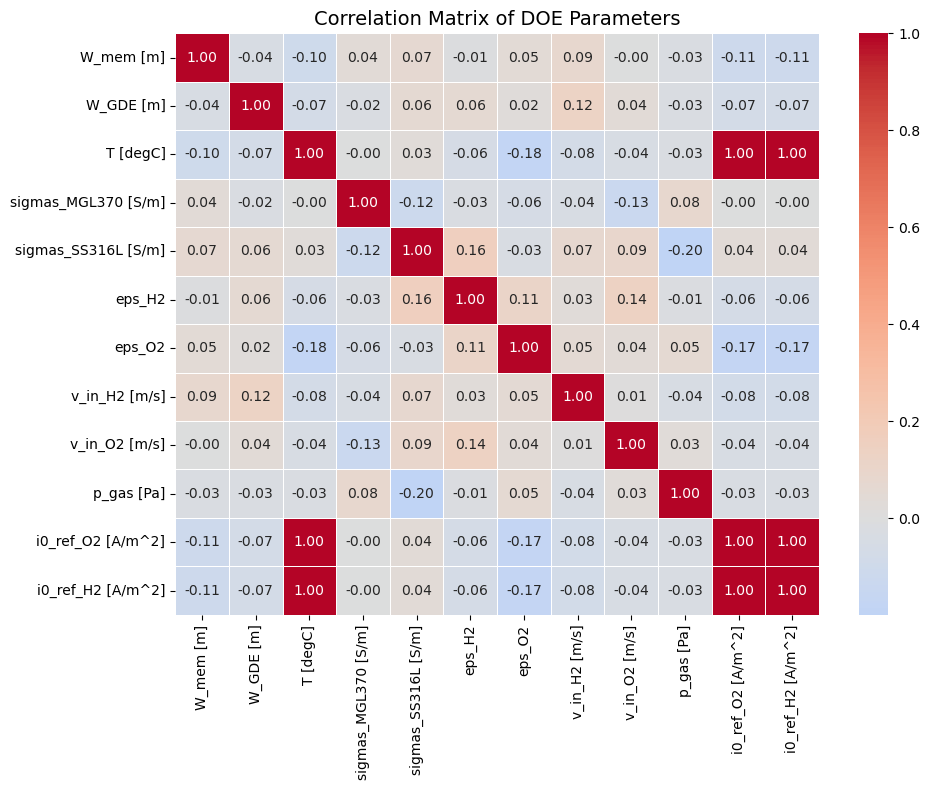

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = doe_data[parameter_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of DOE Parameters", fontsize=14)
plt.tight_layout()
# plt.savefig("IMAGES/DOE_correlation_matrix.png", dpi=300)
plt.show()


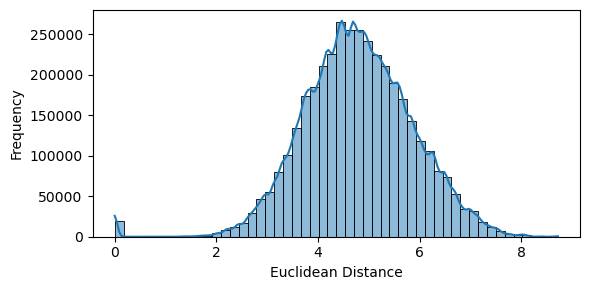

In [26]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist

X_scaled = StandardScaler().fit_transform(doe_data[parameter_columns])
distances = pdist(X_scaled, metric='euclidean')

# Make plot
plt.figure(figsize=(6, 3))
sns.histplot(distances, bins=50, kde=True)
# plt.title("Distribution of Pairwise Distances Between DOE Samples")
plt.xlabel("Euclidean Distance")
plt.ylabel("Frequency")
plt.tight_layout()
# plt.savefig("IMAGES/DOE_distance_distribution.png", dpi=300)
plt.show()
